In [74]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np
from scipy.stats import boxcox
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Model
from keras.layers import Input, LSTM, Dense, LSTMCell, RNN, Bidirectional, concatenate,TimeDistributed,RepeatVector
from numpy import array
from keras.layers import*
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pmdarima as pm
from matplotlib.pyplot import figure

In [2]:
df=pd.read_csv("weather_final_data3.csv",usecols=['Humidity', 'Pressure', 'Temp', 'Time'])
df1=pd.read_csv("weather2019.csv",usecols=['Humidity', 'Pressure', 'Temp', 'Time'])

In [3]:
df=pd.concat([df,df1],ignore_index=True)

In [4]:
df=df.iloc[:-1,:]

In [5]:
df2=pd.read_csv("Weatherdata.csv")

In [6]:
df.shape

(3279, 4)

In [7]:
df_f=pd.concat([df,df2],axis=1)

In [8]:
df2.tail()

,date,temperature_min,temperature_max,visibility,wind_gust,wind_speed,precipitation,snow_depth,temperature
3274,2019-12-19 00:00:00 UTC,44.2,73.0,1.4,0.0,0.6,0.0,0.0,59.5
3275,2019-12-20 00:00:00 UTC,48.4,74.8,1.4,0.0,0.5,0.0,0.0,59.7
3276,2019-12-21 00:00:00 UTC,48.9,74.8,1.5,0.0,0.7,0.0,0.0,61.9
3277,2019-12-22 00:00:00 UTC,51.1,72.0,2.0,0.0,0.6,0.0,0.0,61.4
3278,2019-12-23 00:00:00 UTC,48.2,73.4,1.2,0.0,1.1,0.0,0.0,63.5


In [9]:
df_f["Date"] = pd.date_range(start='1/1/2011',end='23/12/2019', freq ='D')

In [10]:
df_f.columns

Index(['Humidity', 'Pressure', 'Temp', 'Time', 'date', 'temperature_min',
       'temperature_max', 'visibility', 'wind_gust', 'wind_speed',
       'precipitation', 'snow_depth', 'temperature', 'Date'],
      dtype='object')

In [11]:
df_f.drop(columns=['Temp', 'Time','wind_gust','snow_depth','date'],inplace=True)

In [12]:
df_f['datetime'] = pd.to_datetime(df_f['Date'])
df_f = df_f.set_index('datetime')
df_f.drop(['Date'], axis=1, inplace=True)
df_f.head()

,Humidity,Pressure,temperature_min,temperature_max,visibility,wind_speed,precipitation,temperature
datetime,,,,,,,,
2011-01-01,38.500000,1012.500000,50.0,72.7,2.5,2.1,0.0,61.0
2011-01-02,53.250000,1014.000000,48.0,72.7,2.5,1.7,0.0,59.9
2011-01-03,73.750000,1016.500000,44.6,70.9,1.8,1.8,0.0,53.8
2011-01-04,32.333333,1015.333333,43.2,65.1,1.7,0.7,0.0,53.3
2011-01-05,43.000000,1013.666667,43.2,66.0,1.7,0.8,0.0,54.4


In [13]:
df_f["temperature_min"].fillna(value=69.866584,inplace=True)
df_f["temperature_max"].fillna(value=92.147978,inplace=True)
df_f["visibility"].fillna(value=2.358307,inplace=True)
df_f["wind_speed"].fillna(value=2.190541,inplace=True)
df_f["precipitation"].fillna(value=0.057635,inplace=True)
df_f["temperature"].fillna(value=69.866584,inplace=True)

In [14]:
df_f=df_f[['Humidity', 'Pressure', 'temperature_min', 'temperature_max', 'temperature', 'precipitation',
       'wind_speed', 'visibility']]

In [15]:
df_f.drop(columns=["temperature"],inplace=True)

In [16]:
df_f.head()

,Humidity,Pressure,temperature_min,temperature_max,precipitation,wind_speed,visibility
datetime,,,,,,,
2011-01-01,38.500000,1012.500000,50.0,72.7,0.0,2.1,2.5
2011-01-02,53.250000,1014.000000,48.0,72.7,0.0,1.7,2.5
2011-01-03,73.750000,1016.500000,44.6,70.9,0.0,1.8,1.8
2011-01-04,32.333333,1015.333333,43.2,65.1,0.0,0.7,1.7
2011-01-05,43.000000,1013.666667,43.2,66.0,0.0,0.8,1.7


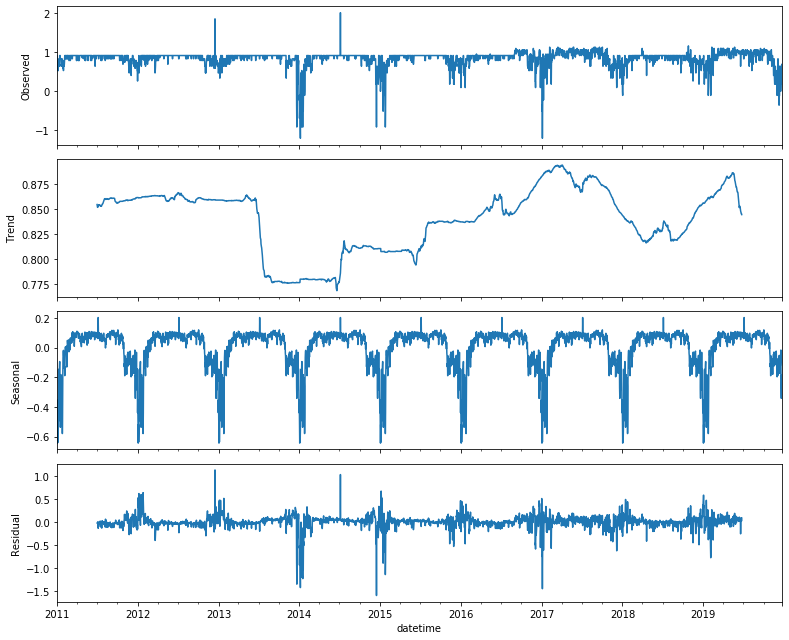

In [17]:
rcParams['figure.figsize'] = 11, 9
decomposed_plt = sm.tsa.seasonal_decompose(log(df_f["visibility"]),freq=365) # The frequncy is annual
figure = decomposed_plt.plot()
plt.show()

In [18]:
result = adfuller(df_f["visibility"])
print('ADF Statistic: %f' % result[0])
print('p-value:' , result[1])

ADF Statistic: -6.765500
p-value: 2.723765116399548e-09


In [19]:
arima = sm.tsa.statespace.SARIMAX(train,order=(2,0,2),seasonal_order=(0,1,2,12),
                                 enforce_stationarity=False, enforce_invertibility=False,).fit()
arima.summary()

NameError: name 'train' is not defined

In [32]:
smodel = pm.auto_arima(df_f["visibility"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=768.505, BIC=798.963, Fit time=51.504 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=3394.938, BIC=3407.121, Fit time=1.545 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1906.300, BIC=1930.666, Fit time=11.507 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1813.823, BIC=1838.189, Fit time=13.141 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=3393.002, BIC=3399.094, Fit time=0.465 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=2767.830, BIC=2792.196, Fit time=3.898 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=772.473, BIC=809.022, Fit time=75.254 seconds
Near non-invertible roots for order (1, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 2, 12); AIC=786.105, BIC=822.655, Fi

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 3279
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -324.498
Date:                            Mon, 30 Dec 2019   AIC                            660.997
Time:                                    13:49:46   BIC                            697.547
Sample:                                         0   HQIC                           674.087
                                           - 3279                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.317e-06      1e-05     -0.430      0.667    -2.4e-05    1.54e-05
ar.L1          1.2427      0.013     93.861      0.000       1.217       1.269
ar.L2         -0.2584      0.011    -22.833      0.000      -0.281      -0.236
ma.L1         -0.8358      0.012    -68.250      0.000      -0.860      -0.812
ma.S.L12      -0.9991      0.036    -27.574      0.000      -1.070      -0.928
sigma2         0.0697      0.002     29.091      0.000       0.065       0.074
===================================================================================
Ljung-Box (Q):                       40.75   Jarque-Bera (JB):            547140.33
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                             2.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

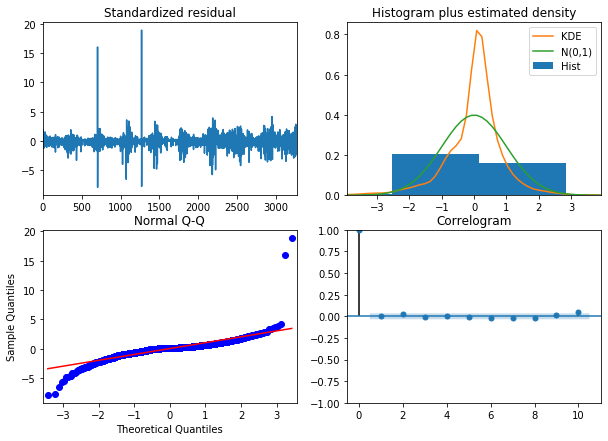

In [44]:
smodel.plot_diagnostics(figsize=(10,7))
plt.show()

In [49]:
future_forecast = arima.predict(start="2011-01-01",end="2019-12-23")
# This returns an array of predictions:
future_forecast.head()
future_forecast = pd.DataFrame(future_forecast,index = df_f.index,columns=["Prediction"])
t=pd.concat([df_f["visibilityvisibilityvisibilityvisibilityvisibilityvisibility"],future_forecast],axis=1)

In [48]:
arima = sm.tsa.statespace.SARIMAX(df_f["visibility"],order=(2,0,1),seasonal_order=(0,1,1,12),
                                 enforce_stationarity=False, enforce_invertibility=False).fit()
arima.summary()

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         visibility   No. Observations:                 3279
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -318.547
Date:                            Mon, 30 Dec 2019   AIC                            647.094
Time:                                    14:33:54   BIC                            677.531
Sample:                                01-01-2011   HQIC                           657.997
                                     - 12-23-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2562      0.013     94.925      0.000       1.230       1.282
ar.L2         -0.2703      0.011    -23.827      0.000      -0.293      -0.248
ma.L1         -0.8367      0.012    -67.784      0.000      -0.861      -0.812
ma.S.L12      -1.0000     52.858     -0.019      0.985    -104.600     102.600
sigma2         0.0699      3.696      0.019      0.985      -7.174       7.314
===================================================================================
Ljung-Box (Q):                       38.55   Jarque-Bera (JB):            556967.64
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             2.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

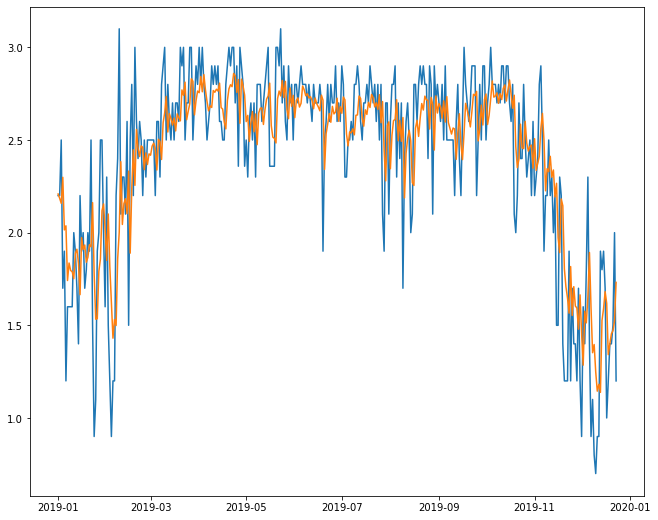

In [61]:
plt.plot(t["visibility"][2922:])
plt.plot(t["Prediction"][2922:])
plt.show()


In [47]:
def mse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    #rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return mean_of_differences_squared   

In [66]:
mse(t["Prediction"][2922:],t["visibility"][2922:])

0.09171860001923934

(-1, 1)

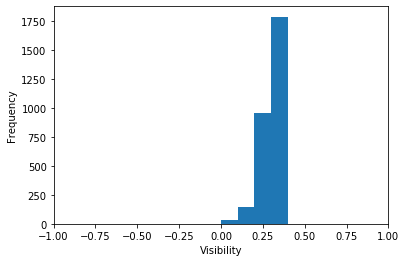

In [62]:
plt.hist(df_sc[6])
plt.xlabel('Visibility')
plt.ylabel('Frequency')
plt.xlim(-1,1)

In [20]:
df_train=df_f[0:2922]
df_test=df_f[2922:]

In [21]:
scaler = MinMaxScaler()

In [22]:
scaler1= MinMaxScaler()

In [23]:
scaler2= MinMaxScaler()

In [24]:
df_scaler_train=scaler.fit_transform(df_train)

In [25]:
df_scaler_train_x=scaler1.fit_transform(df_train.iloc[:,:6])

In [26]:
df_scaler_train_y=scaler2.fit_transform(df_train.iloc[:,6:])

In [27]:
df_scaler_test=scaler.transform(df_test)

In [52]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, 6:]
        X.append(seq_x)
        y.append(seq_y)
    
    return array(X), array(y)

# Stacked lstm layer 

In [53]:
n_steps = 3
# convert into input/output
X,y= split_sequences(df_scaler_train, n_steps)

In [55]:
model = Sequential()
model.add(LSTM(128,input_shape=(n_steps,7) ,return_sequences = True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam",metrics=['mse', 'mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 3, 128)            69632     
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 128)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 201,345
Trainable params: 201,345
Non-trainable params: 0
________________________________________________

In [56]:
x_test,y_test =split_sequences(df_scaler_test, n_steps)

In [57]:
model.fit(X, 
          y,  
          epochs=300,
          validation_data=(x_test,y_test)) 

Train on 2919 samples, validate on 354 samples
Epoch 1/300
2919/2919 [==============================] - 3s 1ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0495 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0472
Epoch 2/300
2919/2919 [==============================] - 1s 502us/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0311 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0454
Epoch 3/300
2919/2919 [==============================] - 1s 508us/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0314 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0478
Epoch 4/300
2919/2919 [==============================] - 1s 501us/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0293 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0441
Epoch 5/300
2919/2919 [==============================] - 1s 502us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0291 - val_loss: 0.0027 - val_mse: 0.0027 - val_mae: 0.0427
Epoch 6/300
2919/2919 [==============================] - 2s 524us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0

KeyboardInterrupt: 

In [58]:
y_hat=model.predict(x_test)

In [59]:
df_hat=pd.DataFrame(y_hat)
df_org=pd.DataFrame(y_test)

In [60]:
max_visibility =np.max(df_train["visibility"])
min_visibility =np.min(df_train["visibility"])

In [61]:
df_hat[0]=df_hat[0].transform(func = lambda x: x*(max_visibility-min_visibility)+min_visibility)

In [62]:
df_org[0]=df_org[0].transform(func = lambda x: x*(max_visibility-min_visibility)+min_visibility)

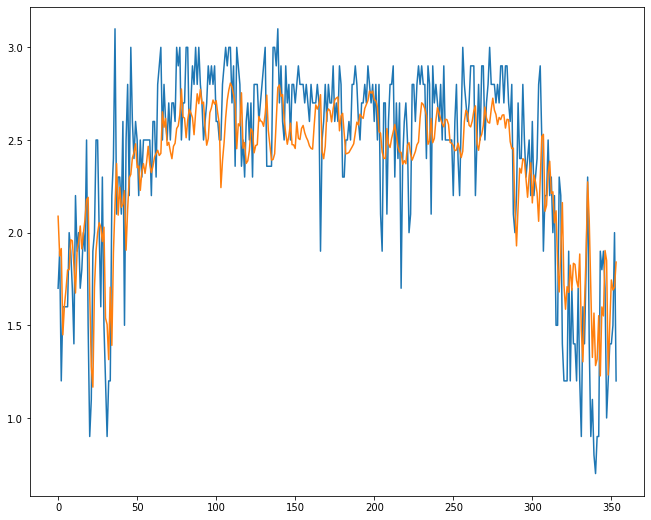

In [63]:
plt.plot(df_org[0])
plt.plot(df_hat[0])

In [66]:
mse(df_hat[0],df_org[0])

0.10468133877120075

# Encoder and decoder

In [28]:
def to_supervised(train, n_input=3, n_out=3):
	# flatten data
	data = train.reshape((train.shape[0], train.shape[1]))
	X = list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			X.append(data[in_start:in_end, :])
		# move along one time step
		in_start += 1
	return array(X)

In [29]:
def to_supervised1(train, n_input=1, n_out=3):
	# flatten data
	data = train.reshape((train.shape[0], train.shape[1]))
	X = list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			X.append(data[in_start:in_end, 6:])
		# move along one time step
		in_start += 1
	return array(X)

In [30]:
df_scaler_train1=df_scaler_train[:-1]

In [31]:
df_scaler_train2=df_scaler_train[3:]

In [32]:
x4=to_supervised(df_scaler_train1)

In [33]:
y4=to_supervised1(df_scaler_train2)

In [34]:
df_scaler_test1=df_scaler_test[:-1]

df_scaler_test2=df_scaler_test[3:]

x5=to_supervised(df_scaler_test1)

y5=to_supervised1(df_scaler_test2)

In [39]:
model2 = Sequential()
model2.add(LSTM(128, activation='relu', input_shape=(3,7), return_sequences=True))
model2.add(LSTM(64, activation='relu', return_sequences=False))
model2.add(RepeatVector(1))
model2.add(LSTM(64, activation='relu', return_sequences=True))
model2.add(LSTM(128, activation='relu', return_sequences=True))
model2.add(TimeDistributed(Dense(1)))
model2.compile(optimizer='adam', loss='mse',metrics=["mse"])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 3, 128)            69632     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 64)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 64)             33024     
_________________________________________________________________
lstm_5 (LSTM)                (None, 1, 128)            98816     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 1)              129       
Total params: 251,009
Trainable params: 251,009
Non-trainable params: 0
________________________________________________

In [40]:
model2.fit(x4, y4, epochs=150,steps_per_epoch=12,verbose=1,validation_data=(x5,y5),validation_steps=3)

Train on 2916 samples, validate on 351 samples
Epoch 1/150
12/12 [==============================] - 8s 637ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.0237 - val_mse: 0.2136
Epoch 2/150
12/12 [==============================] - 5s 389ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0097 - val_mse: 0.0877
Epoch 3/150
12/12 [==============================] - 5s 396ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0014 - val_mse: 0.0128
Epoch 4/150
12/12 [==============================] - 5s 390ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0017 - val_mse: 0.0157
Epoch 5/150
12/12 [==============================] - 5s 383ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0014 - val_mse: 0.0124
Epoch 6/150
12/12 [==============================] - 5s 385ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0014 - val_mse: 0.0130
Epoch 7/150
12/12 [==============================] - 5s 392ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0014 - val_mse: 0.0124
Epoch 8/150
12/12 [===

In [67]:
plt.close()

In [41]:
y_hat1=[]
y_act1=[]

In [42]:
y_pred1=model2.predict(x5)

for f in range(351):
    y_hat1.append(y_pred1[f][0][0])
    y_act1.append(y5[f][0][0])

In [44]:
df_o1=pd.DataFrame(np.array(y_act1))

df_p1=pd.DataFrame(np.array(y_hat1))

In [ ]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

In [49]:
max_visibility =np.max(df_train["visibility"])
min_visibility =np.min(df_train["visibility"])
df_p1[0]=df_p1[0].transform(func = lambda x: x*(max_visibility-min_visibility)+min_visibility)
df_o1[0]=df_o1[0].transform(func = lambda x: x*(max_visibility-min_visibility)+min_visibility)

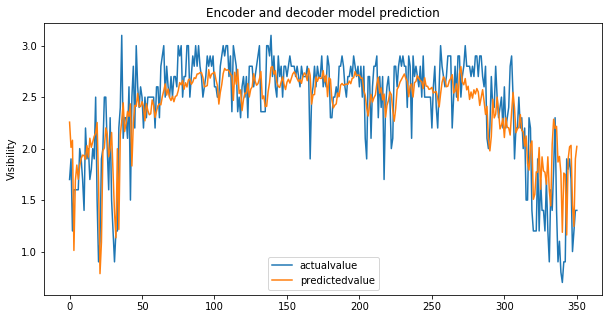

In [81]:
plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(df_o1[0],label="actualvalue")
ax.plot(df_p1[0],label="predictedvalue")
plt.title('Encoder and decoder model prediction')
plt.ylabel('Visibility')
ax.legend()

In [51]:
mse(df_p1[0],df_o1[0])

0.10917357474903078